# Prediction of flight cancellation using machine learning

## Summary of the project

This project aims to compare machine learning algorithms such as Decision Tree, Random Forest, Logistic Regression, and Neural Networks. By changing their parameters using Grid Search and also applying the K-fold cross-validation technique the best outcome of each model was achieved, which will be shown below. This file contains all steps of conducting analysis starting from data analysis, preprocessing, modeling and outcome results. 

## 1. Data preparation

### 1.1. Data loading and exploration

Importing libraries for data preparation. Necessary libraries are Sklearn, Pandas, Seaborn, Matplotlib, and Numpy.

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In order to show all columns and rows without any summary, the next lines were executed. 

In [2]:
pd.set_option("display.max_columns", None)
pd.options.display.min_rows = 100

Data for March 2020 is downloaded from the Bureau of Transportation Statistics (BTS) website and the data frame was created from this CSV file. As it can be noticed there are many noisy values that are repeating each other. 

In [3]:
df_usaflights=pd.read_csv('/Users/Meiirzhan/Downloads/DataFinal.csv', low_memory=False)
df_usaflights.head(25)

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK                FL_DATE  \
0   2020        1      3            12            4  3/12/2020 12:00:00 AM   
1   2020        1      3            13            5  3/13/2020 12:00:00 AM   
2   2020        1      3            14            6  3/14/2020 12:00:00 AM   
3   2020        1      3            15            7  3/15/2020 12:00:00 AM   
4   2020        1      3            16            1  3/16/2020 12:00:00 AM   
5   2020        1      3            17            2  3/17/2020 12:00:00 AM   
6   2020        1      3            18            3  3/18/2020 12:00:00 AM   
7   2020        1      3            19            4  3/19/2020 12:00:00 AM   
8   2020        1      3            20            5  3/20/2020 12:00:00 AM   
9   2020        1      3            21            6  3/21/2020 12:00:00 AM   
10  2020        1      3            22            7  3/22/2020 12:00:00 AM   
11  2020        1      3            23            1  3/23/2020 12:00:00 AM   
12  2020        1      3            24            2  3/24/2020 12:00:00 AM   
13  2020        1      3            25            3  3/25/2020 12:00:00 AM   
14  2020        1      3            26            4  3/26/2020 12:00:00 AM   
15  2020        1      3            27            5  3/27/2020 12:00:00 AM   
16  2020        1      3            28            6  3/28/2020 12:00:00 AM   
17  2020        1      3            29            7  3/29/2020 12:00:00 AM   
18  2020        1      3            30            1  3/30/2020 12:00:00 AM   
19  2020        1      3            31            2  3/31/2020 12:00:00 AM   
20  2020        1      3             1            7   3/1/2020 12:00:00 AM   
21  2020        1      3             2            1   3/2/2020 12:00:00 AM   
22  2020        1      3             3            2   3/3/2020 12:00:00 AM   
23  2020        1      3             4            3   3/4/2020 12:00:00 AM   
24  2020        1      3             5            4   3/5/2020 12:00:00 AM   

   OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  \
0                 AA                  19805         AA   N764US   
1                 AA                  19805         AA   N758US   
2                 AA                  19805         AA   N314PD   
3                 AA                  19805         AA   N177XF   
4                 AA                  19805         AA   N831AW   
5                 AA                  19805         AA   N940NN   
6                 AA                  19805         AA   N905AN   
7                 AA                  19805         AA   N748UW   
8                 AA                  19805         AA   N767UW   
9                 AA                  19805         AA   N947AN   
10                AA                  19805         AA   N835AW   
11                AA                  19805         AA   N839AW   
12                AA                  19805         AA   N956NN   
13                AA                  19805         AA   N940NN   
14                AA                  19805         AA   N816AW   
15                AA                  19805         AA   N839AW   
16                AA                  19805         AA      NaN   
17                AA                  19805         AA   N767UW   
18                AA                  19805         AA      NaN   
19                AA                  19805         AA   N950AN   
20                AA                  19805         AA   N354PT   
21                AA                  19805         AA   N335PH   
22                AA                  19805         AA   N945NN   
23                AA                  19805         AA   N954NN   
24                AA                  19805         AA   N995NN   

    OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
0                1523              14262                1426204   
1                1523              14262                1426204   
2                1523          

Shape of the data frame is consisting of 648229 rows and 64 columns

In [4]:
df_usaflights.shape

(648229, 64)

Standard deviation gives information about the spread of values in each column. Columns with similar values in all rows can be found Where the standard deviation is 0, such as YEAR, QUARTER, MONTH, and FLIGHTS. 

In [5]:
df_usaflights.describe()

YEAR   QUARTER     MONTH   DAY_OF_MONTH    DAY_OF_WEEK  \
count  648229.0  648229.0  648229.0  648229.000000  648229.000000   
mean     2020.0       1.0       3.0      15.951185       3.896140   
std         0.0       0.0       0.0       8.870545       2.072263   
min      2020.0       1.0       3.0       1.000000       1.000000   
25%      2020.0       1.0       3.0       8.000000       2.000000   
50%      2020.0       1.0       3.0      16.000000       4.000000   
75%      2020.0       1.0       3.0      24.000000       6.000000   
max      2020.0       1.0       3.0      31.000000       7.000000   

       OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
count          648229.000000      648229.000000      648229.000000   
mean            19995.202100        2635.459012       12661.810872   
std               375.252128        1794.698362        1527.027526   
min             19393.000000           1.000000       10135.000000   
25%             19790.000000        1096.000000       11292.000000   
50%             19977.000000        2274.000000       12889.000000   
75%             20368.000000        4097.000000       14027.000000   
max             20452.000000        6655.000000       16869.000000   

       ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  ORIGIN_STATE_FIPS  \
count           6.482290e+05          648229.000000      648229.000000   
mean            1.266185e+06           31759.659907          26.793015   
std             1.527025e+05            1310.418902          16.512677   
min             1.013506e+06           30070.000000           1.000000   
25%             1.129202e+06           30693.000000          12.000000   
50%             1.288903e+06           31453.000000          26.000000   
75%             1.402702e+06           32523.000000          42.000000   
max             1.686901e+06           35991.000000          78.000000   

          ORIGIN_WAC  DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  \
count  648229.000000    648229.000000         6.482290e+05   
mean       54.049245     12661.716518         1.266176e+06   
std        26.141542      1526.969579         1.526967e+05   
min         1.000000     10135.000000         1.013506e+06   
25%        34.000000     11292.000000         1.129202e+06   
50%        44.000000     12889.000000         1.288903e+06   
75%        81.000000     14027.000000         1.402702e+06   
max        93.000000     16869.000000         1.686901e+06   

       DEST_CITY_MARKET_ID  DEST_STATE_FIPS       DEST_WAC   CRS_DEP_TIME  \
count        648229.000000    648229.000000  648229.000000  648229.000000   
mean          31759.468674        26.792842      54.053679    1337.744441   
std            1310.261510        16.511279      26.139559     499.860581   
min           30070.000000         1.000000       1.000000       1.000000   
25%           30693.000000        12.000000      34.000000     914.000000   
50%           31453.000000        26.000000      44.000000    1330.000000   
75%           32523.000000        42.000000      81.000000    1747.000000   
max           35991.000000        78.000000      93.000000    2359.000000   

            DEP_TIME      DEP_DELAY  DEP_DELAY_NEW      DEP_DEL15  \
count  538275.000000  538273.000000  538273.000000  538273.000000   
mean     1338.600466       1.483506       6.653954       0.094153   
std       507.867870      35.389909      34.103814       0.292042   
min         1.000000     -80.000000       0.000000       0.000000   
25%       915.000000      -8.000000       0.000000       0.000000   
50%      1334.000000      -5.000000       0.000000       0.000000   
75%      1750.000000      -1.000000       0.000000       0.000000   
max      2400.000000    2579.000000    2579.000000       1.000000   

       DEP_DELAY_GROUP       TAXI_OUT     WHEELS_OFF      WHEELS_ON  \
count    538273.000000  538149.000000  538149.000000  537872.000000   
mean         -0.487808      15.737909    1361.891160    1471.831116   
std

Info command gives a summary of the data, where the number of non-null values is shown. Many columns in the data have missing values which will be handled in the further steps.

In [6]:
df_usaflights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648229 entries, 0 to 648228
Data columns (total 64 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   648229 non-null  int64  
 1   QUARTER                648229 non-null  int64  
 2   MONTH                  648229 non-null  int64  
 3   DAY_OF_MONTH           648229 non-null  int64  
 4   DAY_OF_WEEK            648229 non-null  int64  
 5   FL_DATE                648229 non-null  object 
 6   OP_UNIQUE_CARRIER      648229 non-null  object 
 7   OP_CARRIER_AIRLINE_ID  648229 non-null  int64  
 8   OP_CARRIER             648229 non-null  object 
 9   TAIL_NUM               599908 non-null  object 
 10  OP_CARRIER_FL_NUM      648229 non-null  int64  
 11  ORIGIN_AIRPORT_ID      648229 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID  648229 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID  648229 non-null  int64  
 14  ORIGIN                 648229 non-nu

In order to identify whether the data is balanced following command is written, where cancelled trips consist of around 17% meaning that our data is imbalanced.

In [7]:
df_usaflights['CANCELLED'].value_counts(normalize=True)

0.0    0.830018
1.0    0.169982
Name: CANCELLED, dtype: float64

Another interesting point can be shown below, where diverted flights are consisting only 0.12% which means that we can't use these columns for any other analysis in the future, as the data is not enough for any training. The same applies to ARR_DEL15.

In [8]:
df_usaflights['DIVERTED'].value_counts(normalize=True)

0.0    0.99877
1.0    0.00123
Name: DIVERTED, dtype: float64

In [9]:
df_usaflights['ARR_DEL15'].value_counts(normalize=True)

0.0    0.900008
1.0    0.099992
Name: ARR_DEL15, dtype: float64

The relation between OP_CARRIER_FL_NUM and OP_CARRIER_AIRLINE_ID was carried out to identify whether the data is repeating the same information. As is shown below, for each OP_CARRIER_FL_NUM several OP_CARRIER_AIRLINE_ID are corresponding, meaning that each carrier flight has several airlines (Laurajmoreno, 2022).

https://github.com/Laurajmoreno/PandasPractice/blob/main/Pandas%20practice%20with%20'Airline%20On-Time%20Performance%20Data'%20from%20US%20Department%20of%20Transportation.ipynb

In [10]:
df_usaflights.groupby('OP_CARRIER_FL_NUM')['OP_CARRIER_AIRLINE_ID'] \
    .agg(['nunique','unique']) \
    .sort_values(by='nunique', ascending=False) \
    .sample(20)

nunique                                      unique
OP_CARRIER_FL_NUM                                                     
1457                     5         [19790, 19393, 19977, 19805, 20368]
76                       5         [20409, 19930, 19805, 20368, 19977]
2418                     5         [19805, 19790, 20368, 19393, 19977]
949                      4                [19790, 20368, 19393, 19930]
1800                     6  [19790, 19393, 19930, 20368, 19805, 19977]
2840                     3                       [19805, 19393, 20368]
3399                     3                       [20398, 19393, 20304]
5783                     2                              [19393, 20304]
5730                     3                       [20304, 19393, 20378]
5344                     4                [19393, 20304, 20363, 20397]
837                      3                       [19790, 19930, 20368]
1720                     4                [19790, 20368, 19393, 19977]
2570                     4                [19805, 20409, 19790, 19393]
2628                     3                       [19805, 19790, 19393]
2861                     2                              [19393, 19805]
1702                     5         [19790, 19393, 19977, 20368, 19805]
3368                     2                              [19393, 20304]
5946                     4                [19393, 20452, 20304, 20378]
3587                     4                [19393, 20452, 20304, 20398]
5402                     4                [19393, 20304, 20363, 20397]

Similarly, the ORIGIN_AIRPORT_ID was compared with ORIGIN_AIRPORT_SEQ_ID and ORIGIN_CITY_MARKET_ID. A random sample was demonstrated for each case, which revealed that ORIGIN_AIRPORT_SEQ_ID and ORIGIN_CITY_MARKET_ID are similar to ORIGIN_AIRPORT_ID, where each ORIGIN_AIRPORT_ID corresponded to one unique value in other two columns. Therefore, ORIGIN_AIRPORT_SEQ_ID and ORIGIN_CITY_MARKET_ID will be dropped.

In [11]:
df_usaflights.groupby('ORIGIN_AIRPORT_ID')['ORIGIN_AIRPORT_SEQ_ID'] \
    .agg(['nunique','unique']) \
    .sort_values(by='nunique', ascending=False) \
    .sample(20)

nunique     unique
ORIGIN_AIRPORT_ID                    
11996                    1  [1199603]
10779                    1  [1077902]
10693                    1  [1069302]
11721                    1  [1172105]
10170                    1  [1017004]
10728                    1  [1072804]
14307                    1  [1430705]
15048                    1  [1504804]
14574                    1  [1457405]
13871                    1  [1387102]
10754                    1  [1075405]
15074                    1  [1507402]
12899                    1  [1289902]
13198                    1  [1319801]
13241                    1  [1324102]
15607                    1  [1560702]
10994                    1  [1099402]
14004                    1  [1400402]
13964                    1  [1396403]
12478                    1  [1247805]

In [12]:
df_usaflights.groupby('ORIGIN_AIRPORT_ID')['ORIGIN_CITY_MARKET_ID'] \
    .agg(['nunique','unique']) \
    .sort_values(by='nunique', ascending=False) \
    .sample(20)

nunique   unique
ORIGIN_AIRPORT_ID                  
12255                    1  [32255]
12441                    1  [32441]
11267                    1  [31267]
12264                    1  [30852]
14254                    1  [34254]
12124                    1  [32124]
11140                    1  [31140]
14709                    1  [30073]
10631                    1  [30631]
10990                    1  [30990]
11503                    1  [31503]
14633                    1  [32547]
14237                    1  [34237]
10728                    1  [30728]
13244                    1  [33244]
10994                    1  [30994]
14843                    1  [34819]
13983                    1  [33983]
11982                    1  [31982]
14955                    1  [34955]

ORIGIN and ORIGIN_WAC are also giving identical information in a different format, therefore ORIGIN_WAC or ORIGIN will be dropped.

In [13]:
df_usaflights.groupby('ORIGIN')['ORIGIN_WAC'] \
    .agg(['nunique','unique']) \
    .sort_values(by='nunique', ascending=False) \
    .sample(20)

nunique unique
ORIGIN                
HSV           1   [51]
SEA           1   [93]
ABE           1   [23]
HNL           1    [2]
TOL           1   [44]
MLB           1   [33]
ALO           1   [61]
DRT           1   [74]
LFT           1   [72]
MEM           1   [54]
PSC           1   [93]
PHF           1   [38]
JAC           1   [88]
EAR           1   [65]
HHH           1   [37]
MLU           1   [72]
DBQ           1   [61]
OGD           1   [87]
YUM           1   [81]
LSE           1   [45]

### 1.2. Data visualization

In [14]:
df_usaflights.sample(5)

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  \
285407  2020        1      3             2            1   
599292  2020        1      3             5            4   
11079   2020        1      3             3            2   
432396  2020        1      3            17            2   
583289  2020        1      3             5            4   

                      FL_DATE OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
285407   3/2/2020 12:00:00 AM                OH                  20397   
599292   3/5/2020 12:00:00 AM                YV                  20378   
11079    3/3/2020 12:00:00 AM                AA                  19805   
432396  3/17/2020 12:00:00 AM                WN                  19393   
583289   3/5/2020 12:00:00 AM                WN                  19393   

       OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
285407         OH   N539EA               5176              11057   
599292         YV   N515MJ               6020              14492   
11079          AA   N103US                401              11057   
432396         WN   N8667D                636              14107   
583289         WN   N767SW               1526              12892   

        ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN  \
285407                1105703                  31057    CLT   
599292                1449202                  34492    RDU   
11079                 1105703                  31057    CLT   
432396                1410702                  30466    PHX   
583289                1289208                  32575    LAX   

          ORIGIN_CITY_NAME ORIGIN_STATE_ABR  ORIGIN_STATE_FIPS  \
285407       Charlotte, NC               NC                 37   
599292  Raleigh/Durham, NC               NC                 37   
11079        Charlotte, NC               NC                 37   
432396         Phoenix, AZ               AZ                  4   
583289     Los Angeles, CA               CA                  6   

       ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  \
285407  North Carolina          36            14098              1409803   
599292  North Carolina          36            12264              1226402   
11079   North Carolina          36            11278              1127805   
432396         Arizona          81            13232              1323202   
583289      California          91            12889              1288903   

        DEST_CITY_MARKET_ID DEST                 DEST_CITY_NAME  \
285407                33667  PHF  Newport News/Williamsburg, VA   
599292                30852  IAD                 Washington, DC   
11079                 30852  DCA                 Washington, DC   
432396                30977  MDW                    Chicago, IL   
583289                32211  LAS                  Las Vegas, NV   

       DEST_STATE_ABR  DEST_STATE_FIPS DEST_STATE_NM  DEST_WAC  CRS_DEP_TIME  \
285407             VA               51      Virginia        38          1500   
599292             VA               51      Virginia        38          1025   
11079              VA               51      Virginia        38           920   
432396             IL               17      Illinois        41          2005   
583289             NV               32        Nevada        85           525   

        DEP_TIME  DEP_DELAY  DEP_DELAY_NEW  DEP_DEL15  DEP_DELAY_GROUP  \
285407    1458.0       -2.0            0.0        0.0             -1.0   
599292    1021.0       -4.0            0.0        0.0             -1.0   
11079      922.0        2.0            2.0        0.0              0.0   
432396       NaN        NaN            NaN        NaN              NaN   
583289     525.0        0.0            0.0        0.0              0.0   

       DEP_TIME_BLK  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  \
285407    1500-1559      12.0      1510.0     1557.0      9.0          1618   
599292    1000-1059      13.0      1034.0     1111.0      7.0          1135   


The bar plot chart constructed below shows the main reason for cancellation. As it can be noticed most of the cancellations are all to the category of D which is security reasons. Because the 2020 March period is referring to the increased Coronavirus spread period. Also, the limitation for the social gathering was declared on March 16 in the USA. Therefore many flights were cancelled due to security reason (Jacob, 2022; Hauck et al., 2020). 


A - Carrier;
B - Weather;
C - National Air System;
D - Security




https://stackoverflow.com/questions/48238305/bar-plot-with-groupby


The histogram below shows the delay in minutes for departure and arrival times of the flights. More flights had departure delays, rather than arrival delays, which means that the flights decreased the air time to compensate the delay or the flights were cancelled because for cancelled flights arrival delays are shown in NaN values.

<AxesSubplot:ylabel='CANCELLATION_CODE'>

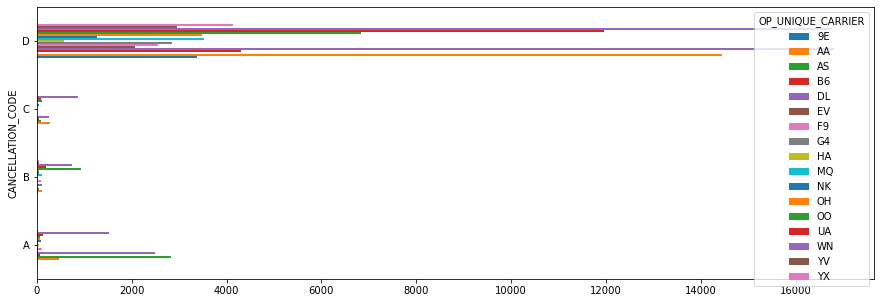

In [15]:
df_usaflights.groupby('CANCELLATION_CODE').OP_UNIQUE_CARRIER.value_counts().unstack().plot.barh(figsize=(15,5))

Text(0, 0.5, 'Count')

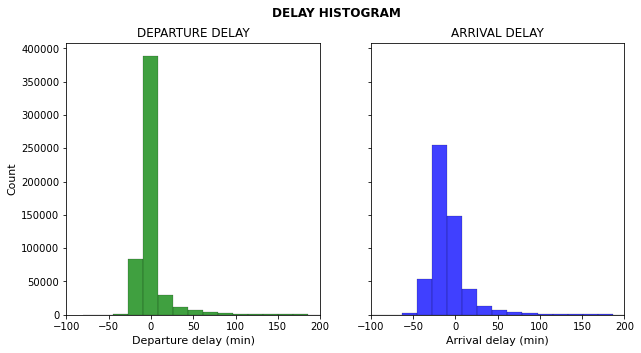

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('DELAY HISTOGRAM', weight='bold')

sns.histplot(data=df_usaflights, x='DEP_DELAY', bins=150, color="Green", ax=axes[0]).set_xlim(-100, 200)
axes[0].set_title("DEPARTURE DELAY")
axes[0].set_xlabel("Departure delay (min)",fontsize=11)
axes[0].set_ylabel("Count",fontsize=11)

sns.histplot(data=df_usaflights, x='ARR_DELAY', bins=150, color="Blue", ax=axes[1]).set_xlim(-100, 200)
axes[1].set_title("ARRIVAL DELAY")
axes[1].set_xlabel("Arrival delay (min)",fontsize=11)
axes[1].set_ylabel("Count",fontsize=11)

The next visualization shows the most popular destination's rating with more frequent flights. According to the results more people are travelling to ATL which consisted of around 34 000 flights (Herbas, 2020).

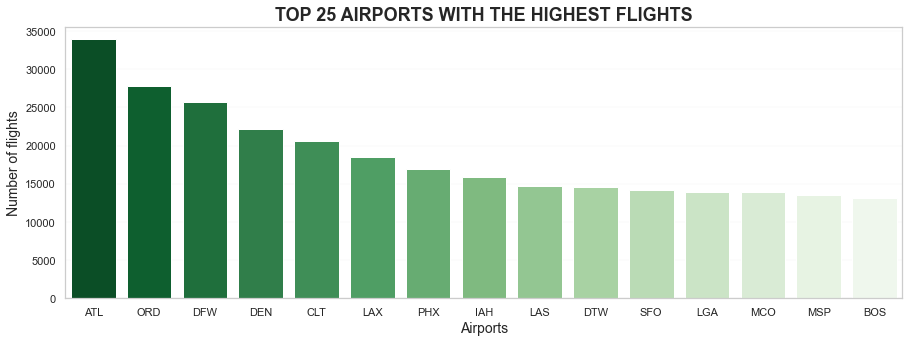

In [17]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1}, palette='Greens')
plt.figure(figsize=(15,5))

sorted_flights = df_usaflights['DEST'].value_counts().to_frame().sort_values('DEST',ascending=False)
sorted_flights.reset_index(inplace=True)
sorted_flights['index'] = sorted_flights['index'].astype('string')
sorted_flights = sorted_flights.head(15)

ax = sns.barplot(x="index", y="DEST", data=sorted_flights, palette = "Greens_r")
ax.axes.set_title("TOP 25 AIRPORTS WITH THE HIGHEST FLIGHTS",fontsize=18, weight='bold')
ax.set_xlabel("Airports",fontsize=14)
ax.set_ylabel("Number of flights",fontsize=14)
ax.tick_params(labelsize=11)

plt.show()

### 1.3. Missing data handling

The doubt about dropping ORIGIN or ORIGIN_WAC and respectively DEST and DEST_WAC was discussed before in 1.1. Section. In order to find which exact columns to drop analysis using a correlation matrix was conducted. Two data frames were created, where one used state abbreviation and the other used state code.

- YEAR, MONTH, QUARTER, FLIGHTS - these columns are dropped, as the values are repeated all over the rows with standard deviation revealing in 0.

- FL_DATE - using this data DAY_OF_WEEK and DAY_OF_MONTH columns

- OP_CARRIER - OP_UNIQUE_CARRIER is used instead as was recommended by the Bureau of Transportation Statistics (Transtats.bts.gov 2022)

- ORIGIN_AIRPORT_SEQ_ID, DEST_AIRPORT_SEQ_ID, ORIGIN_CITY_MARKET_ID, DEST_CITY_MARKET_ID - these columns were identical with ORIGIN_AIRPORT_ID and DEST_AIRPORT_ID columns

- ORIGIN_CITY_NAME, DEST_CITY_NAME - city abbreviations or codes were used instead of city names.

- ORIGIN_STATE_NM, DEST_STATE_NM - state abbreviation or code was used instead of state names.

- ARR_DELAY_NEW, DEP_DELAY_NEW - identical to ARR_DELAY or DEP_DELAY.

- DEP_DELAY_GROUP - as DEP_DELAY_GROUP and ARR_DELAY_GROUP have almost the same values only one of them was left. Also, DEP_DELAY_GROUP gives similar information as DEP_DELAY.

- ARR_TIME_BLK, DEP_TIME_BLK - is the period when ARR and DEP will take place. As the time is already written BLK value is not needed.

- CANCELLATION_CODE - this value is highly correlated to CANCELLED, if the prediction is conducted for CANCELLED, CANCELLATION_CODE need to be dropped. 

- DISTANCE_GROUP - DISTANCE and DISTANCE_GROUP give similar information.

- FIRST_DEP_TIME, TOTAL_ADD_GTIME, LONGEST_ADD_GTIME, DIVERTED - due to the very limited amount of these data, columns were dropped.

In [18]:
df_usaflights_name = df_usaflights.drop(columns=['YEAR','MONTH','QUARTER','FL_DATE','OP_CARRIER','ORIGIN_AIRPORT_SEQ_ID',
                                            'ORIGIN_CITY_MARKET_ID','ORIGIN_CITY_NAME','ORIGIN_STATE_FIPS',
                                            'ORIGIN_STATE_NM','ORIGIN_WAC','DEST_AIRPORT_SEQ_ID',
                                            'DEST_CITY_MARKET_ID','DEST_CITY_NAME','DEST_STATE_FIPS',
                                            'DEST_STATE_NM','DEST_WAC','DEP_DELAY_NEW','DEP_DELAY_GROUP',
                                            'DEP_TIME_BLK','ARR_DELAY_NEW','ARR_TIME_BLK','CANCELLATION_CODE',
                                            'FLIGHTS','DISTANCE_GROUP','FIRST_DEP_TIME','TOTAL_ADD_GTIME',
                                            'LONGEST_ADD_GTIME', 'DIVERTED'])

In [19]:
df_usaflights_code = df_usaflights.drop(columns=['YEAR','MONTH','QUARTER','FL_DATE','OP_CARRIER','ORIGIN_AIRPORT_SEQ_ID',
                                            'ORIGIN_CITY_MARKET_ID','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR',
                                            'ORIGIN_STATE_NM','ORIGIN','DEST_AIRPORT_SEQ_ID',
                                            'DEST_CITY_MARKET_ID','DEST_CITY_NAME','DEST_STATE_ABR',
                                            'DEST_STATE_NM','DEST','DEP_DELAY_NEW','DEP_DELAY_GROUP',
                                            'DEP_TIME_BLK','ARR_DELAY_NEW','ARR_TIME_BLK','CANCELLATION_CODE',
                                            'FLIGHTS','DISTANCE_GROUP','FIRST_DEP_TIME','TOTAL_ADD_GTIME',
                                            'LONGEST_ADD_GTIME', 'DIVERTED'])

As CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY have around 97% missing data, they will be dropped (threshold is 33%).

In [20]:
df_usaflights_name = df_usaflights_name.dropna(thresh=len(df_usaflights_name) * 0.67, axis=1)
df_usaflights_code = df_usaflights_code.dropna(thresh=len(df_usaflights_code) * 0.67, axis=1)

As it can be seen below, only known values of actual departure delay are consisting only around 0.2% (233/110187) of all cancelled trips quantity. There is no arrival delay as the trip was cancelled. Therefore there are  two choices of filling this missing data. 
1) fill them with contant 0.0 value, as the flight was cancelled 

2) fill them with mean values. 

These two choices will be compared with each other in Grid Search method. 

In terms of not cancelled flights, it will be better to drop the rows with missing values separately as the not cancelled flights already have enough data. Therefore it is assumed that filling them with mean value will change the data, and dropping them will help to sustain original data. 

In [21]:
df_usaflights_name.loc[df_usaflights_name['CANCELLED'] == 1.0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110187 entries, 4 to 647380
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           110187 non-null  int64  
 1   DAY_OF_WEEK            110187 non-null  int64  
 2   OP_UNIQUE_CARRIER      110187 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  110187 non-null  int64  
 4   TAIL_NUM               61868 non-null   object 
 5   OP_CARRIER_FL_NUM      110187 non-null  int64  
 6   ORIGIN_AIRPORT_ID      110187 non-null  int64  
 7   ORIGIN                 110187 non-null  object 
 8   ORIGIN_STATE_ABR       110187 non-null  object 
 9   DEST_AIRPORT_ID        110187 non-null  int64  
 10  DEST                   110187 non-null  object 
 11  DEST_STATE_ABR         110187 non-null  object 
 12  CRS_DEP_TIME           110187 non-null  int64  
 13  DEP_TIME               233 non-null     float64
 14  DEP_DELAY              231 non-null 

In [22]:
df_usaflights_c1=df_usaflights_name.loc[df_usaflights_name['CANCELLED'] == 1.0]
df_usaflights_c2=df_usaflights_code.loc[df_usaflights_code['CANCELLED'] == 1.0]

In [23]:
df_usaflights_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110187 entries, 4 to 647380
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           110187 non-null  int64  
 1   DAY_OF_WEEK            110187 non-null  int64  
 2   OP_UNIQUE_CARRIER      110187 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  110187 non-null  int64  
 4   TAIL_NUM               61868 non-null   object 
 5   OP_CARRIER_FL_NUM      110187 non-null  int64  
 6   ORIGIN_AIRPORT_ID      110187 non-null  int64  
 7   ORIGIN                 110187 non-null  object 
 8   ORIGIN_STATE_ABR       110187 non-null  object 
 9   DEST_AIRPORT_ID        110187 non-null  int64  
 10  DEST                   110187 non-null  object 
 11  DEST_STATE_ABR         110187 non-null  object 
 12  CRS_DEP_TIME           110187 non-null  int64  
 13  DEP_TIME               233 non-null     float64
 14  DEP_DELAY              231 non-null 

In [24]:
df_usaflights_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110187 entries, 4 to 647380
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           110187 non-null  int64  
 1   DAY_OF_WEEK            110187 non-null  int64  
 2   OP_UNIQUE_CARRIER      110187 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  110187 non-null  int64  
 4   TAIL_NUM               61868 non-null   object 
 5   OP_CARRIER_FL_NUM      110187 non-null  int64  
 6   ORIGIN_AIRPORT_ID      110187 non-null  int64  
 7   ORIGIN_STATE_FIPS      110187 non-null  int64  
 8   ORIGIN_WAC             110187 non-null  int64  
 9   DEST_AIRPORT_ID        110187 non-null  int64  
 10  DEST_STATE_FIPS        110187 non-null  int64  
 11  DEST_WAC               110187 non-null  int64  
 12  CRS_DEP_TIME           110187 non-null  int64  
 13  DEP_TIME               233 non-null     float64
 14  DEP_DELAY              231 non-null 

In [25]:
df_usaflights_nc1=df_usaflights_name.loc[df_usaflights_name['CANCELLED'] == 0.0]
df_usaflights_nc2=df_usaflights_code.loc[df_usaflights_code['CANCELLED'] == 0.0]

In [26]:
df_usaflights_nc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538042 entries, 0 to 648228
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           538042 non-null  int64  
 1   DAY_OF_WEEK            538042 non-null  int64  
 2   OP_UNIQUE_CARRIER      538042 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  538042 non-null  int64  
 4   TAIL_NUM               538040 non-null  object 
 5   OP_CARRIER_FL_NUM      538042 non-null  int64  
 6   ORIGIN_AIRPORT_ID      538042 non-null  int64  
 7   ORIGIN                 538042 non-null  object 
 8   ORIGIN_STATE_ABR       538042 non-null  object 
 9   DEST_AIRPORT_ID        538042 non-null  int64  
 10  DEST                   538042 non-null  object 
 11  DEST_STATE_ABR         538042 non-null  object 
 12  CRS_DEP_TIME           538042 non-null  int64  
 13  DEP_TIME               538042 non-null  float64
 14  DEP_DELAY              538042 non-nu

In [27]:
df_usaflights_nc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538042 entries, 0 to 648228
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           538042 non-null  int64  
 1   DAY_OF_WEEK            538042 non-null  int64  
 2   OP_UNIQUE_CARRIER      538042 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  538042 non-null  int64  
 4   TAIL_NUM               538040 non-null  object 
 5   OP_CARRIER_FL_NUM      538042 non-null  int64  
 6   ORIGIN_AIRPORT_ID      538042 non-null  int64  
 7   ORIGIN                 538042 non-null  object 
 8   ORIGIN_STATE_ABR       538042 non-null  object 
 9   DEST_AIRPORT_ID        538042 non-null  int64  
 10  DEST                   538042 non-null  object 
 11  DEST_STATE_ABR         538042 non-null  object 
 12  CRS_DEP_TIME           538042 non-null  int64  
 13  DEP_TIME               538042 non-null  float64
 14  DEP_DELAY              538042 non-nu

All missing values are dropped in not cancelled dataframe.

In [28]:
df_usaflights_nc1 = df_usaflights_nc1.dropna()
df_usaflights_nc2 = df_usaflights_nc2.dropna()

After dropping values in not cancelled dataframe, cancelled and not cancelled dataframes are combined. 

In [29]:
df_usaflights_name=df_usaflights_nc1.append(df_usaflights_c1)
df_usaflights_code=df_usaflights_nc2.append(df_usaflights_c2)

This lines show the unique values per column

In [30]:
df_usaflights_name.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
TAIL_NUM                 5444
OP_CARRIER_FL_NUM        6392
ORIGIN_AIRPORT_ID         351
ORIGIN                    351
ORIGIN_STATE_ABR           52
DEST_AIRPORT_ID           351
DEST                      351
DEST_STATE_ABR             52
CRS_DEP_TIME             1258
DEP_TIME                 1425
DEP_DELAY                 837
DEP_DEL15                   2
TAXI_OUT                  132
WHEELS_OFF               1418
WHEELS_ON                1440
TAXI_IN                   105
CRS_ARR_TIME             1337
ARR_TIME                 1439
ARR_DELAY                 869
ARR_DEL15                   2
ARR_DELAY_GROUP            15
CANCELLED                   2
CRS_ELAPSED_TIME          471
ACTUAL_ELAPSED_TIME       647
AIR_TIME                  618
DISTANCE                 1465
dtype: int64

In [31]:
df_usaflights_code.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
TAIL_NUM                 5444
OP_CARRIER_FL_NUM        6392
ORIGIN_AIRPORT_ID         351
ORIGIN_STATE_FIPS          52
ORIGIN_WAC                 52
DEST_AIRPORT_ID           351
DEST_STATE_FIPS            52
DEST_WAC                   52
CRS_DEP_TIME             1258
DEP_TIME                 1425
DEP_DELAY                 837
DEP_DEL15                   2
TAXI_OUT                  132
WHEELS_OFF               1418
WHEELS_ON                1440
TAXI_IN                   105
CRS_ARR_TIME             1337
ARR_TIME                 1439
ARR_DELAY                 869
ARR_DEL15                   2
ARR_DELAY_GROUP            15
CANCELLED                   2
CRS_ELAPSED_TIME          471
ACTUAL_ELAPSED_TIME       647
AIR_TIME                  618
DISTANCE                 1465
dtype: int64

Now for comparison of keeping city/state abbreviation or code correlation matrix was used. As the correlation matrix only takes values of numerical format, names should be replaced by numerical value. As the assumption names were replcased by their frequency in a whole month. Similarly state names and also tail numbers of the planes were also replaced by the frequency values. 

All of NaN Tail Numbers are located in cancelled flights, therefore deleting them will lead to decreased cancelled trips thereby limitiing our training data. Therefore, replacing them with more frequent Tail Numbers will be better, otherwise creating another category of "Missing" tail numbers may be another option. s there are more than 5 000 Tail Numbers leaving them as categorical values is not an option, as it will affect the complexity of model running. 

As it can be noticed, purely in CANCELLED line name frequency and code usage did not reveal obvious difference. As name frequency comes up with more information rather than city/state name, replacing with frequency value thereby showing popularity of the flight choice was selected. Assumption that is made in this case is the popularity of city/state can reveal in more flights thereby leading to more flight cancellations. 

In [32]:
foc_cols=['DEST', 'DEST_STATE_ABR', 'ORIGIN_STATE_ABR', 'ORIGIN', 'TAIL_NUM']

In [33]:
for i in range(len(foc_cols)): 
    df_sorted = df_usaflights_name[foc_cols[i]].value_counts().to_frame().sort_values(foc_cols[i],ascending=False) 
    df_sorted.reset_index(inplace=True)
    df_sorted['index'] = df_sorted['index'].astype('string')
    dict_data = df_sorted.set_index('index').to_dict()
    df_usaflights_name[foc_cols[i]] = df_usaflights_name[foc_cols[i]].map(df_sorted.set_index('index')[foc_cols[i]])

df_usaflights_name.head()


DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0            12            4                AA                  19805   
1            13            5                AA                  19805   
2            14            6                AA                  19805   
3            15            7                AA                  19805   
6            18            3                AA                  19805   

   TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN  ORIGIN_STATE_ABR  \
0     148.0               1523              14262    1535             69071   
1     125.0               1523              14262    1535             69071   
2     124.0               1523              14262    1535             69071   
3     146.0               1523              14262    1535             69071   
6     105.0               1523              14262    1535             69071   

   DEST_AIRPORT_ID   DEST  DEST_STATE_ABR  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  \
0            11298  25653           68495          1042    1109.0       27.0   
1            11298  25653           68495          1042    1051.0        9.0   
2            11298  25653           68495          1042    1035.0       -7.0   
3            11298  25653           68495          1042    1038.0       -4.0   
6            11298  25653           68495          1042    1044.0        2.0   

   DEP_DEL15  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  \
0        1.0      21.0      1130.0     1539.0     14.0          1534   
1        0.0      12.0      1103.0     1524.0     11.0          1534   
2        0.0      15.0      1050.0     1507.0     10.0          1534   
3        0.0      12.0      1050.0     1508.0     11.0          1534   
6        0.0      12.0      1056.0     1520.0      7.0          1534   

   ARR_TIME  ARR_DELAY  ARR_DEL15  ARR_DELAY_GROUP  CANCELLED  \
0    1553.0       19.0        1.0              1.0        0.0   
1    1535.0        1.0        0.0              0.0        0.0   
2    1517.0      -17.0        0.0             -2.0        0.0   
3    1519.0      -15.0        0.0             -1.0        0.0   
6    1527.0       -7.0        0.0             -1.0        0.0   

   CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  
0             172.0                164.0     129.0    1126.0  
1             172.0                164.0     141.0    1126.0  
2             172.0                162.0     137.0    1126.0  
3             172.0                161.0     138.0    1126.0  
6             172.0                163.0     144.0    1126.0

In [34]:
fig1 = plt.figure(figsize=(32,32), dpi = 300)
sns.heatmap(df_usaflights_name.corr(), annot = True, fmt = '.2f')

<AxesSubplot:>

In [35]:
fig1 = plt.figure(figsize=(32,32), dpi = 300)
sns.heatmap(df_usaflights_code.corr(), annot = True, fmt = '.2f')

<AxesSubplot:>

In the correlation matrix some values were highly correlated with other. Therefore finding this columns and drop them will help to prevent overfitting in the future, especially for the models such as Decision Tree and Random Forest.  This columns were identified using for and if loops using Krishna's (2020) method. 

https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb

In [36]:
def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Correlated features are same for both name frequency and code dataframes. The columns 'ARR_TIME', 'ARR_DELAY','CRS_DEP_TIME', 'DISTANCE', 'WHEELS_OFF' will be dropped in Train/Test split step. As this values may result in overfitting if not dropped. As DEP_TIME was highly correlated with CRS_DEP_TIME, CRS_DEP_TIME was dropped and DEP_TIME was keeped as it shows real departed time. 

In [37]:
corr_features = correlation(df_usaflights_name, 0.9)
len(set(corr_features))
corr_features

{'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'ARR_DELAY',
 'ARR_TIME',
 'DEP_TIME',
 'DISTANCE',
 'WHEELS_OFF'}

In [38]:
corr_features = correlation(df_usaflights_code, 0.9)
len(set(corr_features))
corr_features

{'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'ARR_DELAY',
 'ARR_TIME',
 'DEP_TIME',
 'DISTANCE',
 'WHEELS_OFF'}

Histograms are plotted for two dataframes to compare data spread. Changing the name to frequency resulted in different plot of DEST/ARR in the histogram compared to the code use. The first histogram that represents name frequency dataframe has right skewed distribution. Code related dataframe has bimodal histogram where two picks are shown (DEST_WAC/ARR_WAC). 

array([[<AxesSubplot:title={'center':'DAY_OF_MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>,
        <AxesSubplot:title={'center':'OP_CARRIER_AIRLINE_ID'}>,
        <AxesSubplot:title={'center':'TAIL_NUM'}>,
        <AxesSubplot:title={'center':'OP_CARRIER_FL_NUM'}>],
       [<AxesSubplot:title={'center':'ORIGIN_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'ORIGIN'}>,
        <AxesSubplot:title={'center':'ORIGIN_STATE_ABR'}>,
        <AxesSubplot:title={'center':'DEST_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'DEST'}>],
       [<AxesSubplot:title={'center':'DEST_STATE_ABR'}>,
        <AxesSubplot:title={'center':'CRS_DEP_TIME'}>,
        <AxesSubplot:title={'center':'DEP_TIME'}>,
        <AxesSubplot:title={'center':'DEP_DELAY'}>,
        <AxesSubplot:title={'center':'DEP_DEL15'}>],
       [<AxesSubplot:title={'center':'TAXI_OUT'}>,
        <AxesSubplot:title={'center':'WHEELS_OFF'}>,
        <AxesSubplot:title={'center':'WHEELS_ON'}>,
        <AxesSubp

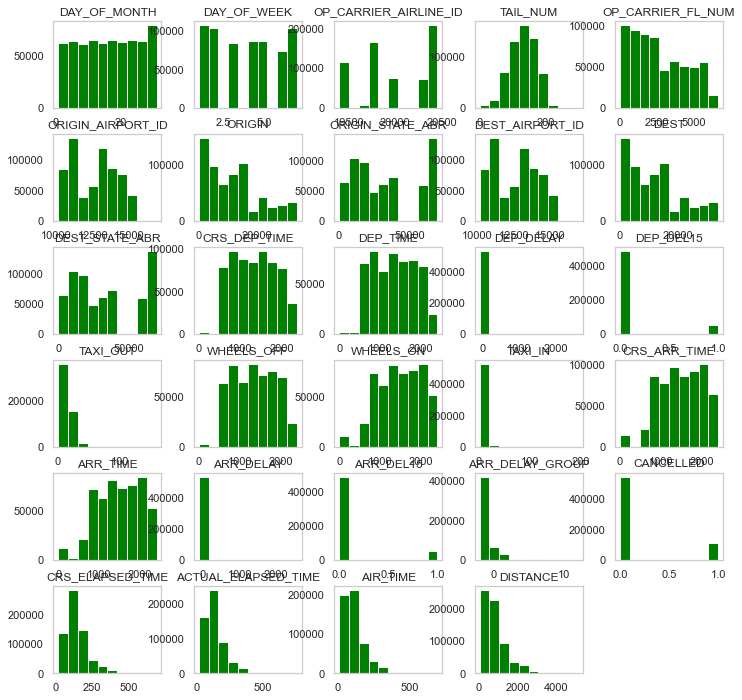

In [39]:
df_usaflights_name.hist(grid=False, figsize=(12,12), color='Green')

array([[<AxesSubplot:title={'center':'DAY_OF_MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>,
        <AxesSubplot:title={'center':'OP_CARRIER_AIRLINE_ID'}>,
        <AxesSubplot:title={'center':'OP_CARRIER_FL_NUM'}>,
        <AxesSubplot:title={'center':'ORIGIN_AIRPORT_ID'}>],
       [<AxesSubplot:title={'center':'ORIGIN_STATE_FIPS'}>,
        <AxesSubplot:title={'center':'ORIGIN_WAC'}>,
        <AxesSubplot:title={'center':'DEST_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'DEST_STATE_FIPS'}>,
        <AxesSubplot:title={'center':'DEST_WAC'}>],
       [<AxesSubplot:title={'center':'CRS_DEP_TIME'}>,
        <AxesSubplot:title={'center':'DEP_TIME'}>,
        <AxesSubplot:title={'center':'DEP_DELAY'}>,
        <AxesSubplot:title={'center':'DEP_DEL15'}>,
        <AxesSubplot:title={'center':'TAXI_OUT'}>],
       [<AxesSubplot:title={'center':'WHEELS_OFF'}>,
        <AxesSubplot:title={'center':'WHEELS_ON'}>,
        <AxesSubplot:title={'center':'TAXI_IN'}>,
        

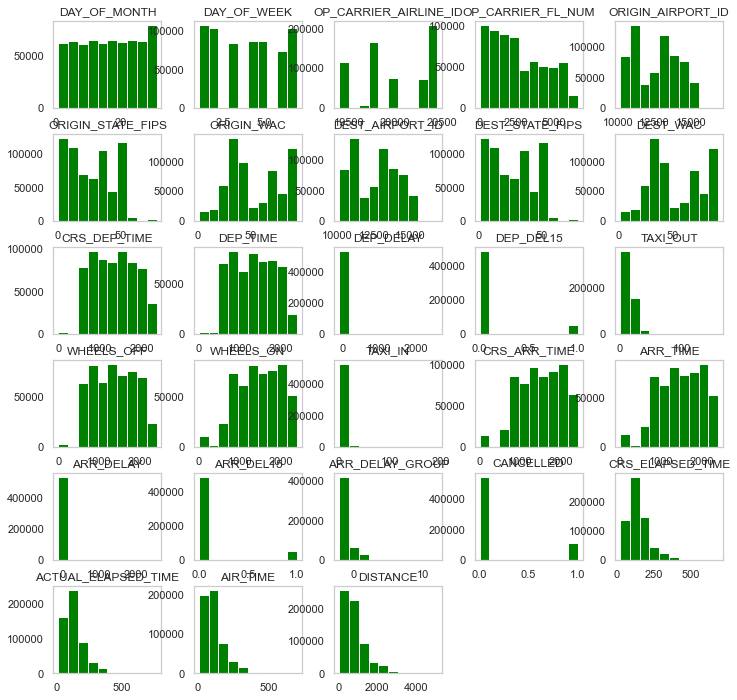

In [40]:
df_usaflights_code.hist(grid=False, figsize=(12,12), color='Green') 

Before moving to Data Processing part, DEP_TIME missing values should be handled. As DEP_TIME missing values are mainly in cancelled flights. Using mean values for this columns may reveal in wrong outcome as the format of this column is hourminute. Therefore fill the missing values with neighbour column CRS_DEP_TIME will be better option.

In [41]:
df_usaflights_name.isnull().mean()*100

DAY_OF_MONTH              0.000000
DAY_OF_WEEK               0.000000
OP_UNIQUE_CARRIER         0.000000
OP_CARRIER_AIRLINE_ID     0.000000
TAIL_NUM                  7.463189
OP_CARRIER_FL_NUM         0.000000
ORIGIN_AIRPORT_ID         0.000000
ORIGIN                    0.000000
ORIGIN_STATE_ABR          0.000000
DEST_AIRPORT_ID           0.000000
DEST                      0.000000
DEST_STATE_ABR            0.000000
CRS_DEP_TIME              0.000000
DEP_TIME                 16.983123
DEP_DELAY                16.983431
DEP_DEL15                16.983431
TAXI_OUT                 17.002584
WHEELS_OFF               17.002584
WHEELS_ON                17.019111
TAXI_IN                  17.019111
CRS_ARR_TIME              0.000000
ARR_TIME                 17.019111
ARR_DELAY                17.019111
ARR_DEL15                17.019111
ARR_DELAY_GROUP          17.019111
CANCELLED                 0.000000
CRS_ELAPSED_TIME          0.000000
ACTUAL_ELAPSED_TIME      17.019111
AIR_TIME            

In [42]:
df_usaflights_name['DEP_TIME']=df_usaflights_name['DEP_TIME'].fillna(df_usaflights_name['CRS_DEP_TIME'])

In [43]:
df_usaflights_name.sample(5)

DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
503663            27            5                AA                  19805   
132263            19            4                OO                  20304   
468245             4            3                OO                  20304   
599474            12            4                YV                  20378   
574192             9            1                WN                  19393   

        TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN  \
503663     119.0                555              13303    8341   
132263     181.0               3897              13487   13524   
468245     214.0               5138              11292   22115   
599474     180.0               6052              12264    5784   
574192     138.0               1508              11292   22115   

        ORIGIN_STATE_ABR  DEST_AIRPORT_ID   DEST  DEST_STATE_ABR  \
503663             59329            13930  27718           36341   
132263             14327            10469    271           18421   
468245             25451            14120     58            1174   
599474             22786            11193   4183            7071   
574192             25451            14831   5079           69141   

        CRS_DEP_TIME  DEP_TIME  DEP_DELAY  DEP_DEL15  TAXI_OUT  WHEELS_OFF  \
503663          1345    1337.0       -8.0        0.0      12.0      1349.0   
132263          1315    1430.0       75.0        1.0       8.0      1438.0   
468245           951     939.0      -12.0        0.0      14.0       953.0   
599474          2215    2208.0       -7.0        0.0      15.0      2223.0   
574192          2110    2127.0       17.0        1.0      12.0      2139.0   

        WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  ARR_DEL15  \
503663     1548.0     17.0          1614    1605.0       -9.0        0.0   
132263     1644.0      6.0          1547    1650.0       63.0        1.0   
468245     1154.0      4.0          1230    1158.0      -32.0        0.0   
599474     2336.0     16.0          2349    2352.0        3.0        0.0   
574192     2308.0      4.0          2250    2312.0       22.0        1.0   

        ARR_DELAY_GROUP  CANCELLED  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  \
503663             -1.0        0.0             209.0                208.0   
132263              4.0        0.0              92.0                 80.0   
468245             -2.0        0.0              99.0                 79.0   
599474              0.0        0.0              94.0                104.0   
574192              1.0        0.0             160.0                165.0   

        AIR_TIME  DISTANCE  
503663     179.0    1197.0  
132263      66.0     426.0  
468245      61.0     385.0  
599474      73.0     388.0  
574192     149.0     948.0

## 2. Data processing 

### 2.1. Train/Test Split

Data is divided to train and test. The values that were highly correlated were dropped in this stage in order to process clean data for training. 

In [44]:
flights_y = df_usaflights_name.CANCELLED
flights_x = df_usaflights_name.drop(columns=['CANCELLED', 'CRS_DEP_TIME', 'ARR_TIME', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_DELAY', 
                                             'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_OFF'])

In [45]:
flights_x.head()

DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0            12            4                AA                  19805   
1            13            5                AA                  19805   
2            14            6                AA                  19805   
3            15            7                AA                  19805   
6            18            3                AA                  19805   

   TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN  ORIGIN_STATE_ABR  \
0     148.0               1523              14262    1535             69071   
1     125.0               1523              14262    1535             69071   
2     124.0               1523              14262    1535             69071   
3     146.0               1523              14262    1535             69071   
6     105.0               1523              14262    1535             69071   

   DEST_AIRPORT_ID   DEST  DEST_STATE_ABR  DEP_TIME  DEP_DELAY  DEP_DEL15  \
0            11298  25653           68495    1109.0       27.0        1.0   
1            11298  25653           68495    1051.0        9.0        0.0   
2            11298  25653           68495    1035.0       -7.0        0.0   
3            11298  25653           68495    1038.0       -4.0        0.0   
6            11298  25653           68495    1044.0        2.0        0.0   

   TAXI_OUT  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  CRS_ELAPSED_TIME  
0      21.0     1539.0     14.0          1534             172.0  
1      12.0     1524.0     11.0          1534             172.0  
2      15.0     1507.0     10.0          1534             172.0  
3      12.0     1508.0     11.0          1534             172.0  
6      12.0     1520.0      7.0          1534             172.0

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(
    flights_x, flights_y, test_size=0.3, random_state=1)  

### 2.2. Missing data imputation, Scaling and Encoding. 

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer


ColumnTransformer is used for imputing the missing data, scaling the data and encoding the categorical value. 

__Imputation__
- As Tail Number is initially was categorical data and replaced with frequency value, it will be better to replace the missing value with more frequent value as each value that is corresponding to Tail Number is referred to its flight frequency. 
- DEP_DELAY, DEP_DEL15 missing values are mainly located in cancelled flights. As was discussed before, these values can be replaced by 0.0 constant value or mean values from not cancelled flights. 
- TAXI_IN, TAXI_OUT, WHEELS_ON values also can be replaced by mean or median values. From the histogram we noticed that these columns are not normally distributed. The assumption that is made for this case is replacing the missing values with median value will result in better outcome as the values are not normally distributed. 

__Scaling__
- The function used for scaling is MinmaxScaler. Another option could be StandardScaler, however due to its limitation where outliers may affect the scaling, this method was not preferable for this project. Also StandardScaler scales all value due to the mean value, assuming data is normally distributed, which is not for the current data (Sharmap, 2021). 

Comments: Spoiler! By completing the simulation, in turned out that mean value was the best parameter. Therefore, it was later changed to mean

__Encoding__
- OneHotEncoder was used to convert OP_UNIQUE_CARRIER column to dummy values 

In [48]:
flights_x.isnull().mean()*100 

DAY_OF_MONTH              0.000000
DAY_OF_WEEK               0.000000
OP_UNIQUE_CARRIER         0.000000
OP_CARRIER_AIRLINE_ID     0.000000
TAIL_NUM                  7.463189
OP_CARRIER_FL_NUM         0.000000
ORIGIN_AIRPORT_ID         0.000000
ORIGIN                    0.000000
ORIGIN_STATE_ABR          0.000000
DEST_AIRPORT_ID           0.000000
DEST                      0.000000
DEST_STATE_ABR            0.000000
DEP_TIME                  0.000000
DEP_DELAY                16.983431
DEP_DEL15                16.983431
TAXI_OUT                 17.002584
WHEELS_ON                17.019111
TAXI_IN                  17.019111
CRS_ARR_TIME              0.000000
CRS_ELAPSED_TIME          0.000000
dtype: float64

In [49]:
imp1 = SimpleImputer(strategy='most_frequent')
imp2 = SimpleImputer(strategy='constant', fill_value=0.0)
imp3 = SimpleImputer(strategy='mean')
enc = OneHotEncoder(sparse=False)
scaler = MinMaxScaler()
tf = ColumnTransformer([('impa', imp1, [4]),('impb', imp2, [13,14]), 
                        ('impc', imp3, [15,16,17])], remainder='passthrough')
tf1 = ColumnTransformer([('enca', enc, [8])], remainder='passthrough')
tf2 = ColumnTransformer([('scaler', scaler, [17,18,20,21,22,23,25,26,27,28,29,30,31,32,
                                             33,34,35])], remainder='passthrough')
pca = PCA()

4 supervised machine learning algorithms were used to predict cancelled flights. 
1) Decision Tree - Simple and effective model that can handle both categorical and numerical independent variables (Yanying et al., 2019)

2) Logistic Regression - two-class model where the outcome can be achieved as NOT CANCELLED 0, CANCELLED 1 (Yanying et al., 2019)

3) Random Forest - algorithm based on a decision tree where multiple trees are built with random features (Yazdi et al., 2020)

4) Neural Networks - adaptive machine learning algorithms that can process complex data, where the outcome is achieved by using hidden layers and neurons as the human brain (Bandyopadhyay et al., 2020).

In [50]:
import tensorflow as tensor 

In [51]:
tensor.__version__ 

'2.2.0'

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [53]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kf = KFold()

In [54]:
clf_dt = DecisionTreeClassifier(random_state=1)

In [76]:
clf_rf = RandomForestClassifier(random_state=1)
lgr = LogisticRegression(random_state=1, max_iter=10000) 

In [56]:
def create_model():
    network = Sequential()
    network.add(Dense(128, activation='relu', input_dim=36))
    network.add(Dense(256, activation='relu'))
    network.add(Dense(1, activation='sigmoid'))
    network.compile(loss='binary_crossentropy',
                optimizer='adam',#sgd
                metrics=['accuracy'])
    return network


clf_nn = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, verbose=0) 

Creating a pipeline helps show the sequence of steps that need to be processed to the computer. Automating and managing the parameters can be easily achieved by implementing a pipeline. For each model pipeline is constructed, where imputation, scaling, encoding, dimensional reduction and modelling steps are shown. 

In [57]:
pipe_dt = Pipeline([('tf', tf),
                    ('tf1', tf1),
                    ('tf2', tf2),  
                    ('pca', pca),   
                    ('dt', clf_dt)])

In [58]:
pcarf=PCA(n_components=32)

In [59]:
pipe_rf = Pipeline([('tf', tf),
                    ('tf1', tf1),
                    ('tf2', tf2),  
                    ('pca', pcarf),   
                    ('rf', clf_rf)])

In [77]:
pipe_lgr = Pipeline([('tf', tf),
                    ('tf1', tf1),
                    ('tf2', tf2),  
                    ('pca', pca),   
                    ('lgr', lgr)])

In [61]:
pipe_nn = Pipeline([('tf', tf),
                    ('tf1', tf1),
                    ('tf2', tf2),  
                    ('pca', pca),   
                    ('nn', clf_nn)])

Some of the parameters are shown below which are referring to max_depth, sample_leaf, etc. 

In [62]:
param_range = [3, 4, 5]
param_range_fl = [1.0, 0.5, 0.1]
pca_param = [30, 32]
n_estimators = [200, 300] 

The next step is to prepare parameters for tweaking. Parameter optimization was conducted for three models, as Neural Network is a computation heavy task.

In [63]:
dt_param_grid = [{'tf__impb__strategy': ['constant','mean'],
                   'tf__impc__strategy': ['mean','median'],
                   'pca__n_components': pca_param,
                   'dt__criterion': ['gini','entropy'],
                   'dt__max_depth': param_range[1:]}]


In [78]:
lgr_param_grid = [{'tf__impb__strategy': ['constant','mean'],
                   'tf__impc__strategy': ['mean','median'],
                   'pca__n_components': pca_param,
                   'lgr__penalty': ['l1', 'l2'],
                   'lgr__C': param_range_fl}] 

In [65]:
rf_param_grid = [{'rf__n_estimators': n_estimators,
                   'rf__criterion': ['gini','entropy'],
                   'rf__max_depth': param_range[:2]}]

This line helps to identify parameters that can be tweaked

In [66]:
pipe_dt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tf', 'tf1', 'tf2', 'pca', 'dt', 'tf__n_jobs', 'tf__remainder', 'tf__sparse_threshold', 'tf__transformer_weights', 'tf__transformers', 'tf__verbose', 'tf__impa', 'tf__impb', 'tf__impc', 'tf__impa__add_indicator', 'tf__impa__copy', 'tf__impa__fill_value', 'tf__impa__missing_values', 'tf__impa__strategy', 'tf__impa__verbose', 'tf__impb__add_indicator', 'tf__impb__copy', 'tf__impb__fill_value', 'tf__impb__missing_values', 'tf__impb__strategy', 'tf__impb__verbose', 'tf__impc__add_indicator', 'tf__impc__copy', 'tf__impc__fill_value', 'tf__impc__missing_values', 'tf__impc__strategy', 'tf__impc__verbose', 'tf1__n_jobs', 'tf1__remainder', 'tf1__sparse_threshold', 'tf1__transformer_weights', 'tf1__transformers', 'tf1__verbose', 'tf1__enca', 'tf1__enca__categories', 'tf1__enca__drop', 'tf1__enca__dtype', 'tf1__enca__handle_unknown', 'tf1__enca__sparse', 'tf2__n_jobs', 'tf2__remainder', 'tf2__sparse_threshold', 'tf2__transformer_weights', 'tf2__transformer

After creating a pipeline and parameters grid, Grid Search was constructed for all three models.

In [67]:
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        n_jobs=-1, 
        verbose=12,
        cv=kf)


In [79]:
lgr_grid_search = GridSearchCV(estimator=pipe_lgr,
        param_grid=lgr_param_grid,
        n_jobs=-1, 
        verbose=12,
        cv=kf)

In [69]:
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid, 
        n_jobs=-1, 
        verbose=12,
        cv=kf)

In [70]:
dt_grid_search = dt_grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

In [121]:
grids_dict = {0: 'Decision Tree', 1: 'Logistic Regression', 2: 'Random Forest'} 

In [74]:
print('{} Accuracy: {}'.format(grids_dict[0],dt_grid_search.score(X_test,Y_test)))
print('{} Best Parameters: {}'.format(grids_dict[0],dt_grid_search.best_params_))
print('{} Confusion Matrix: {}'.format(grids_dict[0],confusion_matrix(Y_test, dt_grid_search.predict(X_test))))
print('{} Recall Score: {}'.format(grids_dict[0],recall_score(Y_test, dt_grid_search.predict(X_test))))
print('{} Precision Score: {}'.format(grids_dict[0],precision_score(Y_test, dt_grid_search.predict(X_test))))
print('{} F1 Score: {}'.format(grids_dict[0],f1_score(Y_test, dt_grid_search.predict(X_test))))

Decision Tree Accuracy: 0.9609123204448334
Decision Tree Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 5, 'pca__n_components': 30, 'tf__impb__strategy': 'constant', 'tf__impc__strategy': 'mean'}
Decision Tree Confusion Matrix: [[161039    429]
 [  7163  25599]]
Decision Tree Recall Score: 0.7813625541786215
Decision Tree Precision Score: 0.9835177501152604
Decision Tree F1 Score: 0.870862391563191


In [118]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, dt_grid_search.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, dt_grid_search.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, dt_grid_search.predict(X_test))))

Mean Absolute Error: 0.03908767955516655
Mean Squared Error: 0.03908767955516655
Root Mean Squared Error: 0.19770604329449962


In [80]:
lgr_grid_search = lgr_grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

In [81]:
print('{} Accuracy: {}'.format(grids_dict[1],lgr_grid_search.score(X_test,Y_test)))
print('{} Best Parameters: {}'.format(grids_dict[1],lgr_grid_search.best_params_))
print('{} Confusion Matrix: {}'.format(grids_dict[1],confusion_matrix(Y_test, lgr_grid_search.predict(X_test))))
print('{} Recall Score: {}'.format(grids_dict[1],recall_score(Y_test, lgr_grid_search.predict(X_test))))
print('{} Precision Score: {}'.format(grids_dict[1],precision_score(Y_test, lgr_grid_search.predict(X_test))))
print('{} F1 Score: {}'.format(grids_dict[1],f1_score(Y_test, lgr_grid_search.predict(X_test))))

Logistic Regression Accuracy: 0.8573186428461103
Logistic Regression Best Parameters: {'lgr__C': 1.0, 'lgr__penalty': 'l2', 'pca__n_components': 32, 'tf__impb__strategy': 'constant', 'tf__impc__strategy': 'mean'}
Logistic Regression Confusion Matrix: [[151921   9547]
 [ 18166  14596]]
Logistic Regression Recall Score: 0.44551614675538737
Logistic Regression Precision Score: 0.6045644700327217
Logistic Regression F1 Score: 0.5129953431157193


In [119]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, lgr_grid_search.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, lgr_grid_search.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, lgr_grid_search.predict(X_test))))

Mean Absolute Error: 0.14268135715388972
Mean Squared Error: 0.14268135715388972
Root Mean Squared Error: 0.3777318588018354


In [82]:
rf_grid_search = rf_grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 1

In [122]:
print('{} Accuracy: {}'.format(grids_dict[2],rf_grid_search.score(X_test,Y_test)))
print('{} Best Parameters: {}'.format(grids_dict[2],rf_grid_search.best_params_))
print('{} Confusion Matrix: {}'.format(grids_dict[2],confusion_matrix(Y_test, rf_grid_search.predict(X_test))))
print('{} Recall Score: {}'.format(grids_dict[2],recall_score(Y_test, rf_grid_search.predict(X_test))))
print('{} Precision Score: {}'.format(grids_dict[2],precision_score(Y_test, rf_grid_search.predict(X_test))))
print('{} F1 Score: {}'.format(grids_dict[2],f1_score(Y_test, rf_grid_search.predict(X_test))))

Random Forest Accuracy: 0.9119291561550739
Random Forest Best Parameters: {'rf__criterion': 'gini', 'rf__max_depth': 4, 'rf__n_estimators': 200}
Random Forest Confusion Matrix: [[161414     54]
 [ 17052  15710]]
Random Forest Recall Score: 0.47951895488675905
Random Forest Precision Score: 0.9965744734838874
Random Forest F1 Score: 0.6474879446070148


In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, rf_grid_search.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, rf_grid_search.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, rf_grid_search.predict(X_test))))

Mean Absolute Error: 0.08807084384492612
Mean Squared Error: 0.08807084384492612
Root Mean Squared Error: 0.2967673227377403


## Neural Network

In [84]:
pipe_nn = pipe_nn.fit(X_train,Y_train)

Neural Network results are highly accurate and values for recall and precision are also high. This result is not reliable as a too accurate and too good model usually hides something inside. Most probably modelling resulted in overfitting, therefore neural network didn't compute correctly.

In [85]:
pipe_nn.score(X_test,Y_test)

0.9995623826980591

In [88]:
Y_pred_nn = pipe_nn.predict(X_test)

In [89]:
confusion_matrix(Y_test, Y_pred_nn)

array([[161441,     27],
       [    58,  32704]], dtype=int64)

In [90]:
recall_score(Y_test, Y_pred_nn)

0.9982296563091386

In [91]:
precision_score(Y_test, Y_pred_nn)

0.9991750939476337

In [92]:
f1_score(Y_test, Y_pred_nn)

0.9987021513749561

In [117]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_nn))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_nn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_nn)))

Mean Absolute Error: 0.00043762549554651704
Mean Squared Error: 0.00043762549554651704
Root Mean Squared Error: 0.020919500365604266


## Output Visualization

For imbalanced data ROC curve will not give proper information, and using precision recall curve instead will be better. As it can be seen below, three curves were constructed. Logistic Regression shows the worst result while Random Forest and Decision Tree has more area under the curve. 

Text(0.5, 1.0, 'Precision-Recall curve')

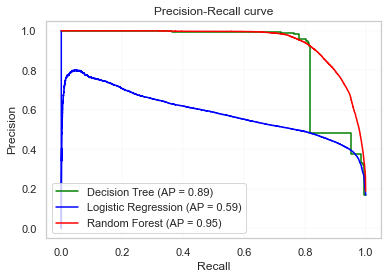

In [94]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(dt_grid_search, X_test, Y_test, ax = plt.gca(),name = "Decision Tree", color='green')
plot_precision_recall_curve(lgr_grid_search, X_test, Y_test, ax = plt.gca(),name = "Logistic Regression", color='blue')
plot_precision_recall_curve(rf_grid_search, X_test, Y_test, ax = plt.gca(),name = "Random Forest", color='red')

plt.title('Precision-Recall curve')

As decision tree shows the highest recall between three model (excluding Neural Network), the decision tree plot was created, which shows the features with the high importancy. 

In [98]:
clean_pipe = Pipeline([('tf', tf),
                    ('tf1', tf1),
                    ('tf2', tf2),  
                    ('pca', PCA(n_components=30))])

In [99]:
clean_pipe=clean_pipe.fit(X_train)

In [100]:
X_train_clean=clean_pipe.transform(X_train)

In [101]:
dt_coef = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth= 5)
dt_coef.fit(X_train_clean, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

Unfortunately, showing the features names was not achieved, as the trained data was processed through the pipeline that converted to array. Therefore features_name couldn't be assigned, which would help to understand which exact data has higher importance. Anyway, X[28] and X[8] are more important features.

In [105]:
from sklearn import tree

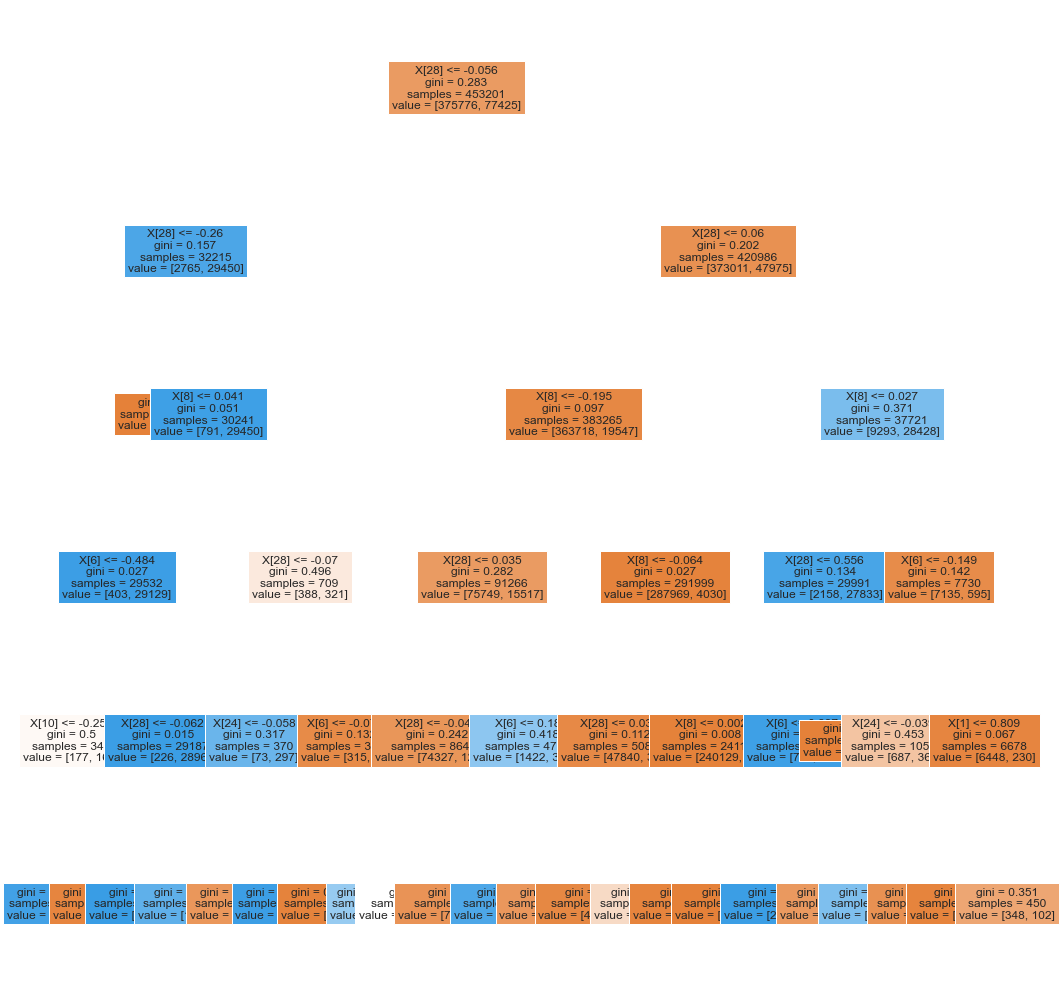

In [115]:
plt.figure(figsize=(18,18))
tree.plot_tree(dt_coef, fontsize=12, filled=True)
plt.show()